<a href="https://colab.research.google.com/github/ane-schow/oceanografia/blob/main/lat_pf_saf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install copernicusmarine
import copernicusmarine as cm
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
from datetime import time

##Acessando os dados

In [ ]:
cm.login()

In [ ]:
cm.subset(
    dataset_id = "cmems_mod_glo_phy_my_0.083deg_P1M-m",
    variables = ["thetao","so"],
    minimum_longitude = -96.507293,
    maximum_longitude = -63.336000,
    minimum_latitude = -74.390233,
    maximum_latitude = -52.683000,
    start_datetime = "1993-01-01T00:00:00",
    end_datetime = "2024-10-21T00:00:00",
    minimum_depth =0,
    maximum_depth =500,
    output_filename = "ccacur_saletemp.nc",
    output_directory = "coper-udata"
)

## Preparando e vizualizando dados

In [6]:
fn = '/content/coper-udata/ccacur_saletemp.nc'
ds = xr.open_dataset(fn)
print(ds.attrs)

{'producer': 'CMEMS - Global Monitoring and Forecasting Centre', 'contact': 'servicedesk.cmems@mercator-ocean.eu', 'credit': 'E.U. Copernicus Marine Service Information (CMEMS)', 'source': 'MERCATOR GLORYS12V1', 'institution': 'Mercator Ocean', 'references': 'http://marine.copernicus.eu', 'title': 'Monthly mean fields for product GLOBAL_REANALYSIS_PHY_001_030', 'Conventions': 'CF-1.6', 'copernicusmarine_version': '2.0.1'}


In [47]:
temp = ds['thetao']
sal = ds['so']
print(sal.shape, sal.dims)

(342, 31, 260, 398) ('time', 'depth', 'latitude', 'longitude')


## Para achar a PF temos que é o limite norte em que a água possui 2 graus Celcius.

In [64]:
depth_limit = 200
depth_indices = np.where(temp['depth'] <= depth_limit)[0]

time = temp['time']
months = np.array([np.datetime64(t.values).astype('datetime64[M]') for t in time])
unique_months = np.unique(months)

monthly_avg_latitudes = {}
for month in unique_months:
    time_indices = np.where(months == month)[0]
    temp_filtered = temp[time_indices, depth_indices, :, :]

    valid_mask = temp_filtered <= 2
    valid_per_lon = np.any(valid_mask, axis=(0, 1))

    min_latitudes_per_lon = np.full(temp.shape[3], np.nan)
    for lon_idx in range(temp.shape[3]):
        valid_latitudes = temp['latitude'][valid_per_lon[:, lon_idx]]

        if valid_latitudes.size > 0:
            min_latitudes_per_lon[lon_idx] = np.max(valid_latitudes)

    monthly_avg_latitudes[month] = np.nanmean(min_latitudes_per_lon)

In [65]:
print(monthly_avg_latitudes)

{numpy.datetime64('1993-01'): -62.00251256281407, numpy.datetime64('1993-02'): -61.94870189685918, numpy.datetime64('1993-03'): -62.08438024089564, numpy.datetime64('1993-04'): -62.07516740195116, numpy.datetime64('1993-05'): -62.35824934801265, numpy.datetime64('1993-06'): -61.90703531006473, numpy.datetime64('1993-07'): -61.43676730975434, numpy.datetime64('1993-08'): -61.51381920090872, numpy.datetime64('1993-09'): -61.32035171087064, numpy.datetime64('1993-10'): -61.218174277837555, numpy.datetime64('1993-11'): -61.33647413589247, numpy.datetime64('1993-12'): -61.65577910533502, numpy.datetime64('1994-01'): -61.65201005983592, numpy.datetime64('1994-02'): -61.535594585552886, numpy.datetime64('1994-03'): -61.67483254054084, numpy.datetime64('1994-04'): -61.953517616693695, numpy.datetime64('1994-05'): -61.863065221201836, numpy.datetime64('1994-06'): -61.371649957781464, numpy.datetime64('1994-07'): -61.02701006942059, numpy.datetime64('1994-08'): -60.95121428714925, numpy.datetime

## Para achar a SAF temos que a salinidade é <34.20 ao norte

In [48]:
depth_limit2 = 300
depth_indices2 = np.where(sal['depth'] <= depth_limit2)[0]

time2 = sal['time']
months2 = np.array([np.datetime64(t.values).astype('datetime64[M]') for t in time2])
unique_months2 = np.unique(months2)

monthly_avg_latitudes2 = {}
for month2 in unique_months2:
    time_indices2 = np.where(months == month2)[0]
    sal_filtered = sal[time_indices2, depth_indices2, :, :]

    valid_mask2 = sal_filtered <= 34.20
    valid_per_lon2 = np.any(valid_mask2, axis=(0, 1))

    min_latitudes_per_lon2 = np.full(sal.shape[3], np.nan)
    for lon_idx2 in range(sal.shape[3]):
        valid_latitudes2 = sal['latitude'][valid_per_lon2[:, lon_idx2]]

        if valid_latitudes2.size > 0:
            min_latitudes_per_lon2[lon_idx2] = np.max(valid_latitudes2)

    monthly_avg_latitudes2[month2] = np.nanmean(min_latitudes_per_lon2)

In [49]:
print(monthly_avg_latitudes2)

{numpy.datetime64('1993-01'): -54.091289836557664, numpy.datetime64('1993-02'): -53.86557788944724, numpy.datetime64('1993-03'): -53.358249606798644, numpy.datetime64('1993-04'): -53.5004187924179, numpy.datetime64('1993-05'): -53.67608877402454, numpy.datetime64('1993-06'): -53.749581197997436, numpy.datetime64('1993-07'): -53.830611425428536, numpy.datetime64('1993-08'): -54.04836690126352, numpy.datetime64('1993-09'): -54.08228641299147, numpy.datetime64('1993-10'): -54.34087104413977, numpy.datetime64('1993-11'): -54.35008375848358, numpy.datetime64('1993-12'): -54.15326630290429, numpy.datetime64('1994-01'): -54.156616469723495, numpy.datetime64('1994-02'): -54.03915407190371, numpy.datetime64('1994-03'): -53.94074539682973, numpy.datetime64('1994-04'): -53.83898674662988, numpy.datetime64('1994-05'): -53.814907888671264, numpy.datetime64('1994-06'): -53.98345891674559, numpy.datetime64('1994-07'): -54.081030083661105, numpy.datetime64('1994-08'): -54.17357630705714, numpy.datetim

##Criando a série temporal

In [66]:
data = np.array(list(monthly_avg_latitudes.keys()))
data2 = np.array(list(monthly_avg_latitudes2.keys()))
valor = np.array(list(monthly_avg_latitudes.values()))
valor2 = np.array(list(monthly_avg_latitudes2.values()))

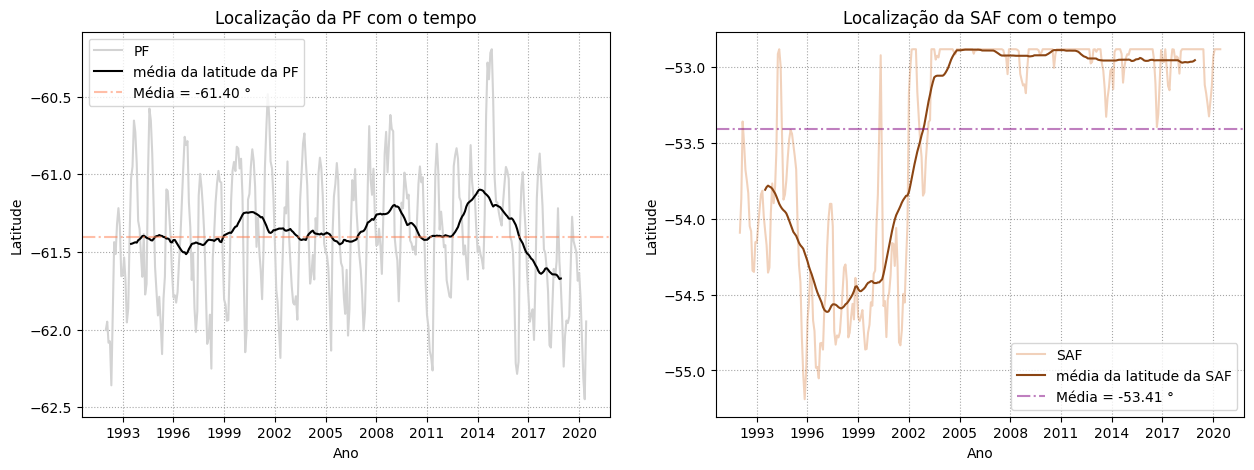

In [71]:
media_latitude = np.mean(valor)
media_latitude2 = np.mean(valor2)
valor_smooth = pd.Series(valor).rolling(window=37, center=True).mean()
valor_smooth2 = pd.Series(valor2).rolling(window=37, center=True).mean()

fig,(ax1, ax2) = plt.subplots(1,2,figsize=(15,5))

ax1.plot(data, valor, linestyle='-', color='lightgray', label='PF')
ax1.plot(data, valor_smooth, linestyle='-', color='k', label='média da latitude da PF')
ax1.axhline(y=media_latitude, color='coral', linestyle='-.', label=f"Média = {media_latitude:.2f} °", alpha = 0.5)
ax1.set_xticks(pd.date_range(start=data.min(), end=data.max(), freq='3YE'))
ax1.set_xticklabels([str(year) for year in pd.date_range(start=data.min(), end=data.max(), freq='3YE').year])
ax1.set_xlabel('Ano')
ax1.set_ylabel('Latitude')
ax1.set_title('Localização da PF com o tempo')
ax1.grid(color='gray',alpha=0.7, linestyle=':')
ax1.legend()

ax2.plot(data2, valor2, linestyle='-', color='chocolate', label='SAF', alpha = 0.3)
ax2.plot(data2, valor_smooth2, linestyle='-', color='saddlebrown', label='média da latitude da SAF')
ax2.set_xticks(pd.date_range(start=data2.min(), end=data2.max(), freq='3YE'))
ax2.set_xticklabels([str(year) for year in pd.date_range(start=data2.min(), end=data2.max(), freq='3YE').year])
ax2.axhline(y=media_latitude2, color='purple', linestyle='-.', label=f"Média = {media_latitude2:.2f} °", alpha = 0.5)
ax2.set_xlabel('Ano')
ax2.set_ylabel('Latitude')
ax2.set_title('Localização da SAF com o tempo')
ax2.grid(color='gray',alpha=0.7, linestyle=':')
ax2.legend()
plt.show()